<a href="https://colab.research.google.com/github/zh777by/DI-bootcamp/blob/main/Environmental_impact_of_different_types_of_power_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('global_power_plant_database.csv')
df

<ipython-input-5-7d2f0892bd01>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [ ]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [ ]:
df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-8-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

In [ ]:
summary_stats = df.describe()
print(summary_stats)

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           16.534583   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1997.414823   
50%       16.745000     39.727750     -2.127100         1997.414823   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           34936.000000         34936.000000         34936.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.048624           932.025542          1014.795407   
min              2000.000000          -947.600000          -989.

<Figure size 1200x800 with 0 Axes>

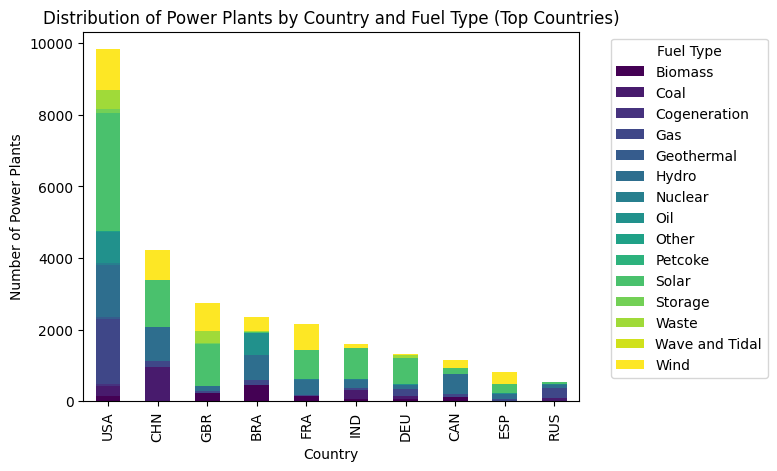

In [ ]:
distribution = df.groupby(['country', 'primary_fuel']).size().reset_index(name='count')

power_plant_counts = df.groupby('country').size().reset_index(name='power_plant_count')
top_countries = power_plant_counts.sort_values(by='power_plant_count', ascending=False).head(10)

distribution_pivot = distribution.pivot(index='country', columns='primary_fuel', values='count')
distribution_pivot_top_countries = distribution_pivot.loc[top_countries['country']]

plt.figure(figsize=(12, 8))
distribution_pivot_top_countries.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Power Plants by Country and Fuel Type (Top Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


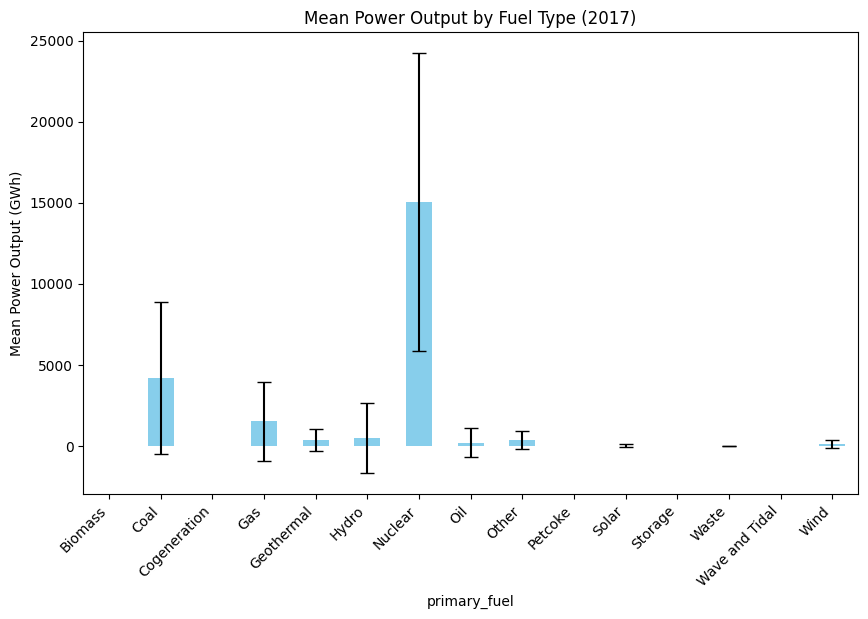

In [ ]:
fuel_and_generation = df[['primary_fuel', 'estimated_generation_gwh_2017']]

grouped_by_fuel = fuel_and_generation.groupby('primary_fuel')

mean_by_fuel = grouped_by_fuel['estimated_generation_gwh_2017'].mean()
median_by_fuel = grouped_by_fuel['estimated_generation_gwh_2017'].median()
std_by_fuel = grouped_by_fuel['estimated_generation_gwh_2017'].std()

fig, ax = plt.subplots(figsize=(10, 6))

mean_by_fuel.plot(kind='bar', yerr=std_by_fuel, capsize=5, color='skyblue', ax=ax)
ax.set_ylabel('Mean Power Output (GWh)')
ax.set_title('Mean Power Output by Fuel Type (2017)')
ax.set_xticklabels(mean_by_fuel.index, rotation=45, ha='right')

plt.show()

In [ ]:
from scipy.stats import f_oneway
fuel_and_generation = df[['primary_fuel', 'estimated_generation_gwh_2017']]

fuel_types = fuel_and_generation['primary_fuel'].unique()
data_by_fuel = {fuel: fuel_and_generation.loc[fuel_and_generation['primary_fuel'] == fuel, 'estimated_generation_gwh_2017'].values
                for fuel in fuel_types}

statistic, p_value = f_oneway(*data_by_fuel.values())

alpha = 0.05

print(f'ANOVA Statistic: {statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that at least one group mean is different.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that any group mean is different.")

ANOVA Statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is not enough evidence to suggest that any group mean is different.


In [ ]:
generation_columns = ['estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                       'estimated_generation_gwh_2017']

generation_data = df[generation_columns].values

mean_generation_per_year = np.mean(generation_data, axis=0)

std_dev_generation_per_year = np.std(generation_data, axis=0)

for year, mean, std_dev in zip(range(2013, 2018), mean_generation_per_year, std_dev_generation_per_year):
    print(f"Year {year}: Mean Generation = {mean:.2f} GWh, Standard Deviation = {std_dev:.2f} GWh")

Year 2013: Mean Generation = nan GWh, Standard Deviation = nan GWh
Year 2014: Mean Generation = nan GWh, Standard Deviation = nan GWh
Year 2015: Mean Generation = nan GWh, Standard Deviation = nan GWh
Year 2016: Mean Generation = nan GWh, Standard Deviation = nan GWh
Year 2017: Mean Generation = nan GWh, Standard Deviation = nan GWh


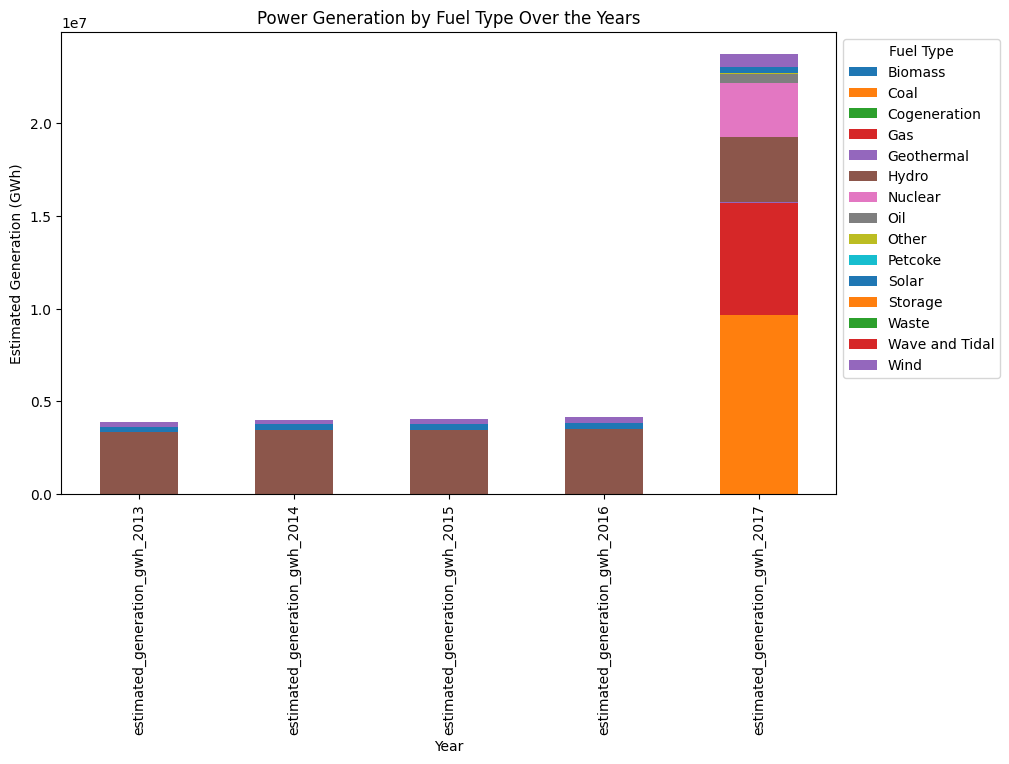

In [ ]:
fuel_columns = ['primary_fuel', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                'estimated_generation_gwh_2017']

fuel_and_generation_data = df[fuel_columns]

fuel_generation_by_year = fuel_and_generation_data.groupby('primary_fuel').sum()

fuel_generation_by_year = fuel_generation_by_year.T

fuel_generation_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Power Generation by Fuel Type Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimated Generation (GWh)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1, 1))
plt.show()

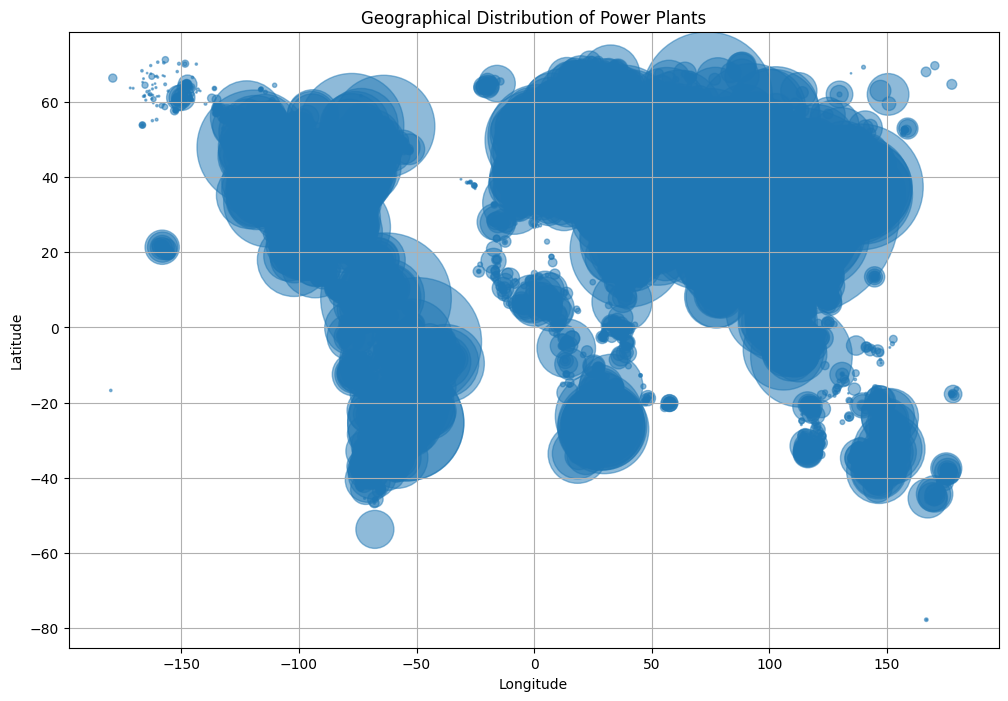

In [ ]:
filtered_data = df.dropna(subset=['latitude', 'longitude'])

plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['longitude'], filtered_data['latitude'], s=filtered_data['capacity_mw'], alpha=0.5)
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

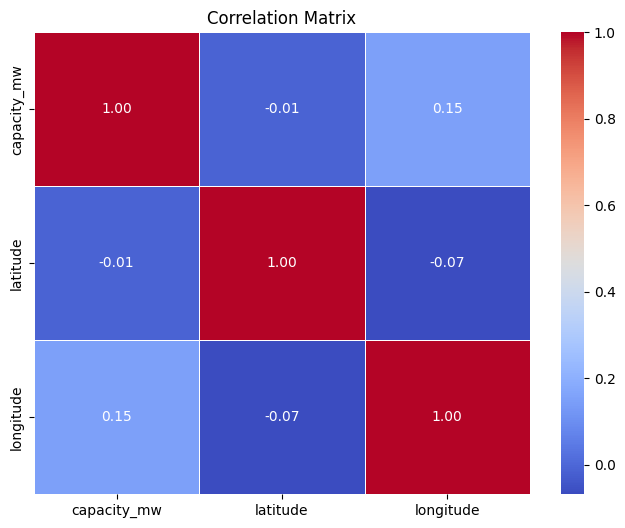

In [ ]:
numerical_columns = ['capacity_mw', 'latitude', 'longitude']

numerical_data = df[numerical_columns]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()